In [27]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from torchmetrics import Accuracy, F1Score, Precision, Recall, Specificity
import torch
from sklearn.metrics import log_loss

In [28]:
def metrics(targets, predictions,number_of_classes, module_type='Train'):
    precision = Precision(task="multiclass", average='macro', num_classes=number_of_classes)
    recall = Recall(task="multiclass", average='macro', num_classes=number_of_classes)
    f_measure = F1Score(task="multiclass", average='macro', num_classes=number_of_classes)
    specificity = Specificity(task="multiclass", average='macro', num_classes=number_of_classes)
    accuracy = Accuracy(task="multiclass", average='macro', num_classes=number_of_classes)
    targets, predictions = torch.tensor(targets), torch.tensor(predictions)
    precision_score = precision(predictions, targets).numpy().reshape(-1)[0]
    recall_score = recall(predictions, targets).numpy().reshape(-1)[0]
    f_measure_score = f_measure(predictions, targets).numpy().reshape(-1)[0]
    specificity_score = specificity(predictions, targets).numpy().reshape(-1)[0]
    Accuracy_score = accuracy(predictions, targets).numpy().reshape(-1)[0]

    metric_results = {
        "Precision": precision_score,
        "recall": recall_score,
        "FMeasure": f_measure_score,
        "Specificity": specificity_score,
        "Accuracy": Accuracy_score,
    }
    return pd.DataFrame.from_dict(metric_results, orient="index", columns=[module_type])

In [29]:
dataset = datasets.load_iris(as_frame=True)['data']
target = datasets.load_iris(as_frame=True)['target'].values
print(dataset.head(5))
print(dataset.describe())

X_train, X_test, y_train, y_test = train_test_split(
    dataset, target, test_size=0.2, random_state=1, shuffle=True)

number_of_classes = 3

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

[Text(0.4, 0.9166666666666666, 'x[2] <= 2.6\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.3, 0.4166666666666667, 'x[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'x[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.7, 0.4166666666666667, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]

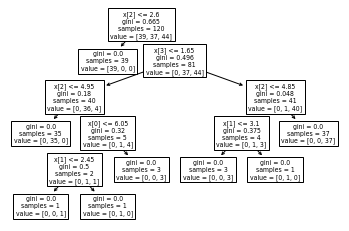

In [30]:
DTModel = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=2).fit(X_train, y_train)
y_train_output = DTModel.predict(X_train)
y_test_output = DTModel.predict(X_test)
tree.plot_tree(DTModel)

In [31]:
train_out_prob = DTModel.predict_proba(X_train)
test_out_prob = DTModel.predict_proba(X_test)
train_logloss = log_loss(y_train, train_out_prob)
test_logloss = log_loss(y_test, test_out_prob)
print(f'train log loss :{train_logloss},\ntest log loss: {test_logloss} ')

train log loss :4.440892098500627e-16,
test log loss: 1.201455112970572 


In [32]:
module_type = ['Train', 'Test']
train_metric = metrics(y_train, y_train_output,number_of_classes, module_type=module_type[0])
test_metric = metrics(y_test, y_test_output,number_of_classes, module_type=module_type[1])
pd.concat([train_metric, test_metric], axis=1)

,Train,Test
Precision,1.0,0.952381
recall,1.0,0.974359
FMeasure,1.0,0.961026
Specificity,1.0,0.986111
Accuracy,1.0,0.974359
